***Unsupervised Learning***

## **Clustering**

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/merge3cluster.jpg">

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/clusteringg.jpg">


## **K Means Clustering**

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In [2]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections #For fetching dictionary of labels & clusters
import nltk #Natural Language Toolkit
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize #Word tokenization is the process of splitting a large sample of text into words.
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer #Normalizing Sentences
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint

[nltk_data] Downloading package stopwords to /home/nsl56/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nsl56/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **Loading a Dataset**

**Self Made Dataset**

In [3]:
# My Dataset contains multiple sentences related to
# Graphics, Snooker, Investment, Software Engineering, Artificial Intelligence, Aviation & Love

sentences = pd.read_csv("./data/Quotes.csv")
sentences

,Quotes
0,Graphics designers are most creative people
1,Artificial Intelligence or AI is the last inve...
2,Snooker is a billiards sport for normally two ...
3,Snooker is played on a large (12 feet by 6 fee...
4,FOREX is the stock market for trading currencies
5,Software Engineering is hotter and hotter topi...
6,Love is blind
7,Snooker is popular in the United Kingdom and m...
8,The flying or operating of aircraft is known a...
9,AI is likely to be either the best or worst th...


####**Converting our dataframe into List**

In [4]:
sentences_list = sentences["Quotes"].tolist()

In [5]:
sentences_list

['Graphics designers are most creative people',
 'Artificial Intelligence or AI is the last invention - humans could ever make',
 'Snooker is a billiards sport for normally two players.',
 'Snooker is played on a large (12 feet by 6 feet) table that is covered with a smooth green material.',
 'FOREX is the stock market for trading currencies',
 'Software Engineering is hotter and hotter topic in Silicon Valley',
 'Love is blind',
 'Snooker is popular in the United Kingdom and many other countries',
 'The flying or operating of aircraft is known as aviation.',
 'AI is likely to be either the best or worst thing happen to humanity',
 'Design is Intelligence made visible.',
 'Falling in love is like being on drugs.',
 'There is only one happiness in Life to Love and to be loved.',
 "Boeing 777 is considered world's largest economical plane in the world of Aviation.",
 'Warren Buffet is famous for making good investments.He knows stock markets',
 'The biggest of the many uses of aviation a

In [10]:
sentences_list[0]

'Graphics designers are most creative people'

## **Defining a function tokenizer(text)**

In [8]:
def tokenizer(text):
    tokens = word_tokenize(text) #Word tokenization is the process of splitting a large sample of text into words.
    stemmer = PorterStemmer()

    #Removing Morphhological axes
    tokens = [stemmer.stem(t) for t in tokens if t not in stopwords.words('english')]
    return tokens


## **Defining a function cluster_sentences(sentences,k=(int))**

#### **1. Training our K - Means Model**
#### **2. Creating tfidf Vectorizer Matrix**

In [40]:
def cluster_sentences(sentences_list, k):
    
    #Create tf ifd again: stopwords--> we filter out common words (I,my, the,and...)
    tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer, stop_words=stopwords.words('english'),lowercase=True)

    #builds a tf-idf matrix for the sentences
    #   Transforms text to feature vectors that can be used as input to estimator. 
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences_list)
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tfidf_matrix)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    clusters = collections.defaultdict(list)
    #print(kmeans.labels_)
    for i, label in enumerate(kmeans.labels_):
        #print(i, label)
        clusters[label].append(i)
    return dict(clusters)
    #return dict(clusters) , centers, labels

## **Testing our Model**

In [41]:
k = 7
clusters = cluster_sentences(sentences_list,k)
pprint(clusters)

{0: [2, 3, 25],
 1: [6, 11, 12, 19, 23, 24],
 2: [4, 14, 17],
 3: [5, 16, 26],
 4: [7, 8, 13, 15, 20, 21],
 5: [1, 9, 18, 27],
 6: [0, 10, 22]}


/home/nsl56/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [42]:
for cluster in range (k):
    print("\nCLUSTER ",cluster,":\n")
    #print("\n center ",cluster_centers[cluster],":\n")
    for i, sentence in enumerate(clusters[cluster]):
        print("\t",(i+1),": ",sentences_list[sentence])


CLUSTER  0 :

	 1 :  Snooker is a billiards sport for normally two players.
	 2 :  Snooker is played on a large (12 feet by 6 feet) table that is covered with a smooth green material.
	 3 :  Stuart Bingham is a champion of Snooker

CLUSTER  1 :

	 1 :  Love is blind
	 2 :  Falling in love is like being on drugs.
	 3 :  There is only one happiness in Life to Love and to be loved.
	 4 :  Being in love is the number one reason why people wed.
	 5 :  Loving from a long distance actually strengthens a relationship
	 6 :  Real love is able to awaken your soul.

CLUSTER  2 :

	 1 :  FOREX is the stock market for trading currencies
	 2 :  Warren Buffet is famous for making good investments.He knows stock markets
	 3 :  Investing in stocks and trading with them are not that easy

CLUSTER  3 :

	 1 :  Software Engineering is hotter and hotter topic in Silicon Valley
	 2 :  All giant majors in Silicon Valley is focusing AI for their business productivity
	 3 :  Software Engineer has average sala

In [9]:
#Create tf ifd again: stopwords--> we filter out common words (I,my, the,and...)
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer, stop_words=stopwords.words('english'),lowercase=True)

#builds a tf-idf matrix for the sentences
#   Transforms text to feature vectors that can be used as input to estimator. 
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences_list)

/home/nsl56/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [10]:
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenizer at 0x7f72817b3560>, use_idf=True,
                vocabulary=None)

In [11]:
# tfidf_matrix
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.40028149, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.35039063]])

## Determine optimal cluster number with elbow method

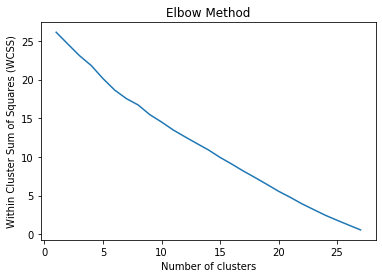

In [13]:
wcss = []

n_sentences = len(sentences_list)

# for i in range(1, 28):
for i in range(1, n_sentences):
    model = KMeans(n_clusters = i,     
                    #init = 'k-means++',                 # Initialization method for kmeans
                    #max_iter = 300,                     # Maximum number of iterations 
                    #n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    #random_state = 0                   # Choose random state for reproducibility
                  )
    model.fit(tfidf_matrix)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, n_sentences), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()
#https://www.datacamp.com/workspace/templates/recipe-python-k-means

Since, the above curve is always decreasing (did not become stable), we can't get decision from elbow method what should be the optimal number of clusters to choose. 